<a href="https://colab.research.google.com/github/Morrissenzeyi/machine-learning-project/blob/master/Hass_Consulting_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1.Define the question**
#a) specifying the question
As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

#b) Defining metric of success
You will be then required to provide your observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem. 

Multiple Linear Regression
Quantile Regression
Ridge Regression
Lasso Regression
Elastic Net Regression

#C) Understanding the context
There is continuous growth in demand for housing as the population increases. With this market growing, many real estate companies have been established, all bringing the housing commodity to the citizens. Housing prices are affected by many factors including, micro economic factors like customers, competitors,suppliers etc.and macro economic factors including demographic, technological, political forces etc. Housing affordability continues to be a key challenge in Kenya given the current high cost of funding and unavailability of financing, amid rising property prices. Keeping all this factors constant, this project will focus on predicting the price of houses given its physical features

#d) Experimental design 
The main aim of the project is to create a predictive model for house prices for the real estate company Hass consulting. Data cleaning and exploratory data analysis will be done before creating the model and evaluation of the model.

In [94]:
# Importing our libraries
#
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Ridge as ridge
from sklearn.linear_model import ElasticNet
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.regression.quantile_regression as quant
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [95]:
# viewing our dataset
df = pd.read_csv("/content/Independent Project Week 7 - house_data.csv")
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [96]:
# view the end of the dataset
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.00,3,2.50,1530,1131,3.00,0,0,3,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,400000.00,4,2.50,2310,5813,2.00,0,0,3,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,402101.00,2,0.75,1020,1350,2.00,0,0,3,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,400000.00,3,2.50,1600,2388,2.00,0,0,3,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287
21612,1523300157,325000.00,2,0.75,1020,1076,2.00,0,0,3,7,1020,0,2008,0,98144,47.59,-122.30,1020,1357


In [97]:
# checking basic information of the whole dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [98]:
# checking for number of rows and collumns
df.shape


(21613, 20)

In [99]:
# checking the range of years
df.yr_built.unique

<bound method Series.unique of 0        1955
1        1951
2        1933
3        1965
4        1987
         ... 
21608    2009
21609    2014
21610    2009
21611    2004
21612    2008
Name: yr_built, Length: 21613, dtype: int64>

In [100]:
# checking for non-values
df.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [101]:
# checking for duplicates
df.duplicated().sum()

3

In [102]:
# dropping duplicates
df.drop_duplicates(keep=False,inplace=True)

In [103]:
# confirming the removal of duplicates
df.duplicated().any()

False

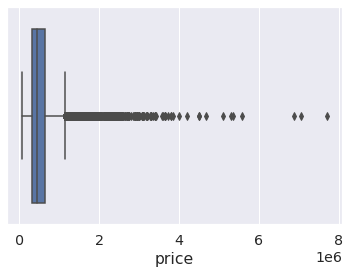

In [104]:
# checking for outliers
sns.boxplot(x = df['price'])
plt.show()

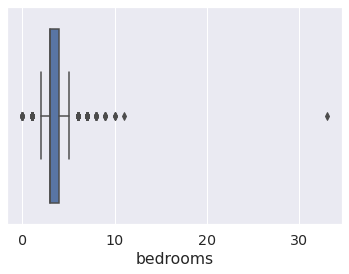

In [105]:
sns.boxplot(x = df['bedrooms'])

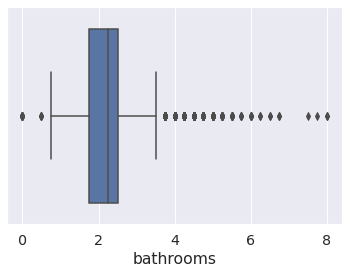

In [106]:
sns.boxplot(x = df['bathrooms'])

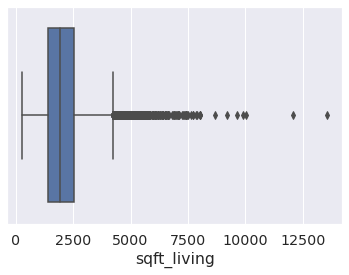

In [107]:
sns.boxplot(x = df['sqft_living'])

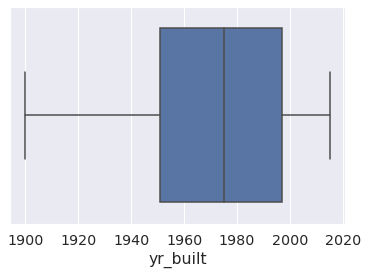

In [108]:
sns.boxplot(x = df['yr_built'])

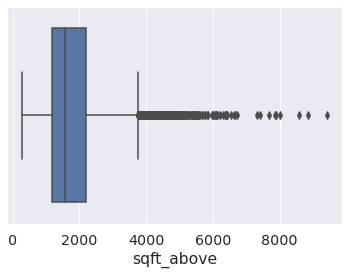

In [109]:
sns.boxplot(x = df['sqft_above'])

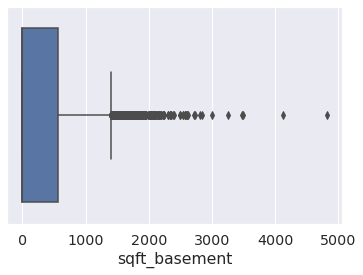

In [110]:
sns.boxplot(x = df['sqft_basement'])

In [111]:
# View the row that has the outlier 

outlier = df[df["bedrooms"] >= 30]
outlier

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,640000.00,33,1.75,1620,6000,1.00,0,0,5,7,1040,580,1947,0,98103,47.69,-122.33,1330,4700


In [112]:
# Dropping the row by index

df = df.drop(df.index[15870])

In [113]:
# Confirm the index row has been deleted.

df.shape

(21606, 20)

#**Exploratory Data Analysis**

#Univariate analysis

In [114]:
df.describe

<bound method NDFrame.describe of                id     price  bedrooms  ...    long  sqft_living15  sqft_lot15
0      7129300520 221900.00         3  ... -122.26           1340        5650
1      6414100192 538000.00         3  ... -122.32           1690        7639
2      5631500400 180000.00         2  ... -122.23           2720        8062
3      2487200875 604000.00         4  ... -122.39           1360        5000
4      1954400510 510000.00         3  ... -122.05           1800        7503
...           ...       ...       ...  ...     ...            ...         ...
21608   263000018 360000.00         3  ... -122.35           1530        1509
21609  6600060120 400000.00         4  ... -122.36           1830        7200
21610  1523300141 402101.00         2  ... -122.30           1020        2007
21611   291310100 400000.00         3  ... -122.07           1410        1287
21612  1523300157 325000.00         2  ... -122.30           1020        1357

[21606 rows x 20 columns]>

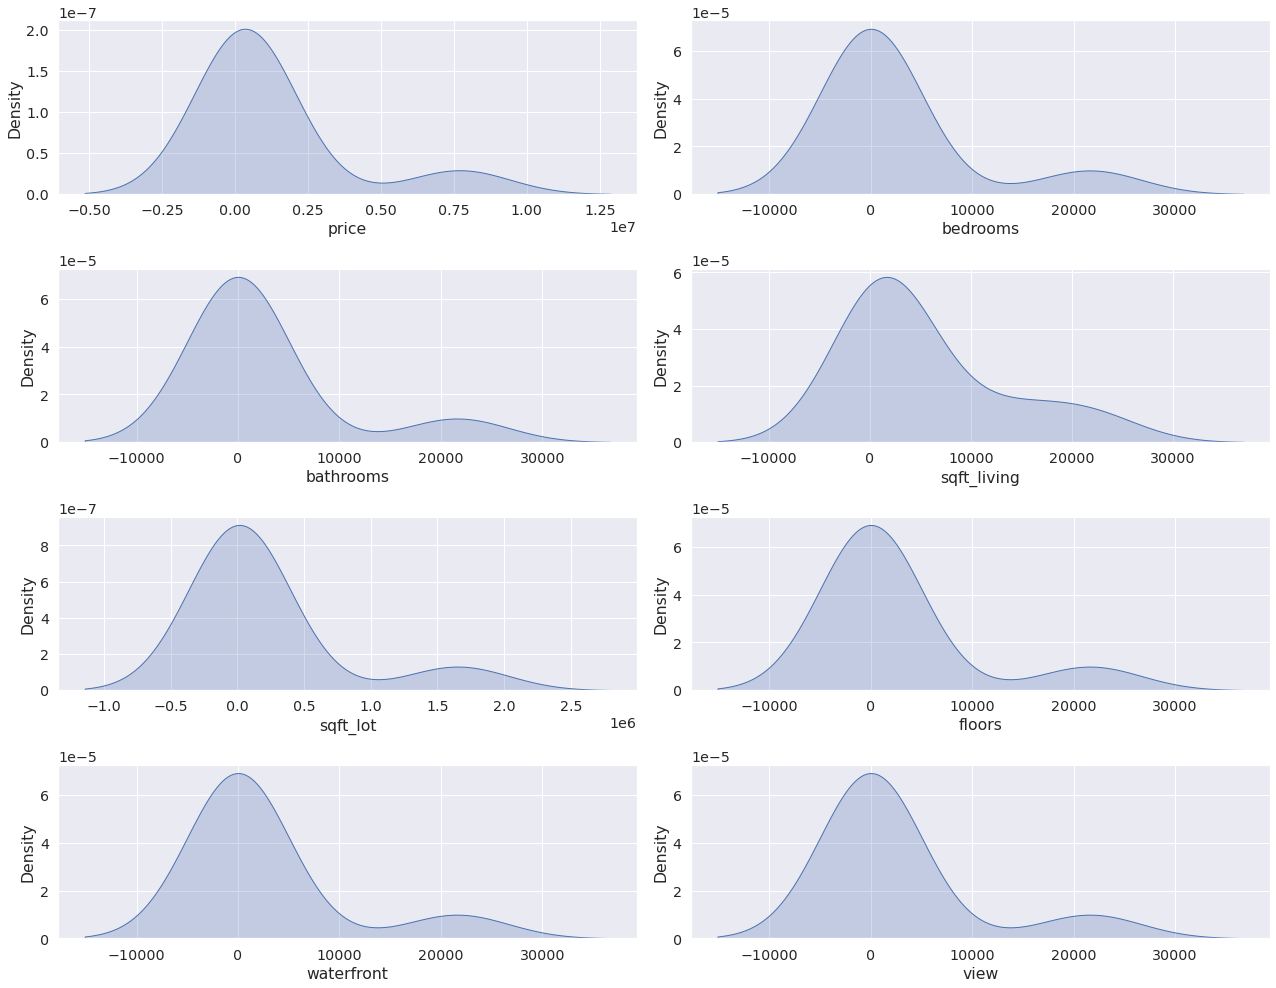

In [115]:
# plotting  the 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' columns
# using the density plot
df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' ]]
df = df.describe()
df 

sns.set(font_scale=1.3)
fig, axes = plt.subplots(4, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(df ):
  plot = sns.kdeplot(data=df, x=c, ax=axes[i], fill=True)
plt.tight_layout()

#Bivariate analysis

In [116]:
# correlation
df = df.corr()
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
price,1.00,-0.19,-0.19,0.37,1.00,-0.19,-0.19,-0.19
bedrooms,-0.19,1.00,1.00,0.84,-0.14,1.00,1.00,1.00
bathrooms,-0.19,1.00,1.00,0.84,-0.14,1.00,1.00,1.00
sqft_living,0.37,0.84,0.84,1.00,0.42,0.84,0.84,0.84
sqft_lot,1.00,-0.14,-0.14,0.42,1.00,-0.14,-0.14,-0.14
floors,-0.19,1.00,1.00,0.84,-0.14,1.00,1.00,1.00
waterfront,-0.19,1.00,1.00,0.84,-0.14,1.00,1.00,1.00
view,-0.19,1.00,1.00,0.84,-0.14,1.00,1.00,1.00


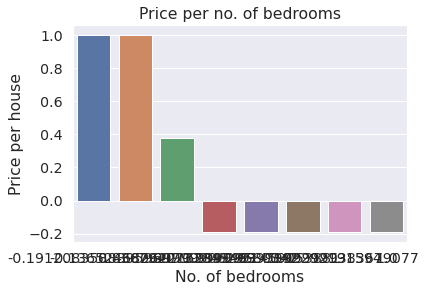

In [117]:
# Barplot of bedrooms vs price

ax = sns.barplot(x = 'bedrooms', y = 'price', data= df, ci=None, estimator=np.median)
ax.set(xlabel='No. of bedrooms',
       ylabel='Price per house',
       title='Price per no. of bedrooms')
plt.show()

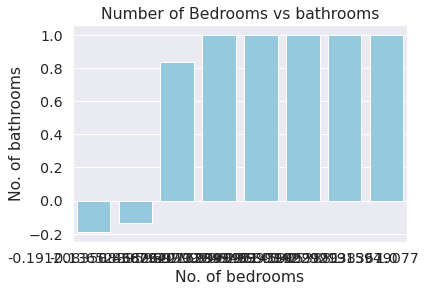

In [118]:
# Barplot of bedroom vs Bathroom

ax = sns.barplot(x = 'bedrooms', y = 'bathrooms', color = 'skyblue', data=df, ci=None)
ax.set(xlabel='No. of bedrooms',
       ylabel='No. of bathrooms',
       title='Number of Bedrooms vs bathrooms')
plt.show()

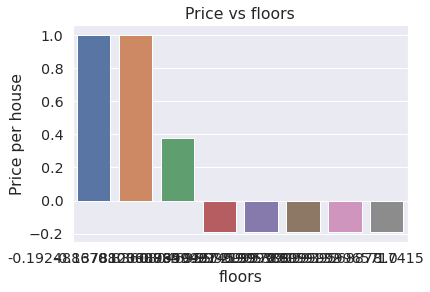

In [119]:

# drawing of price vs floors

ax = sns.barplot(x = 'floors', y = 'price', data=df, ci=None, estimator=np.median)
ax.set(xlabel='floors',
       ylabel='Price per house',
       title='Price vs floors')
plt.show()

#Multivariate Analysis

In [120]:
corr = df.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
price,1.00,-0.97,-0.97,-0.81,1.00,-0.97,-0.97,-0.97
bedrooms,-0.97,1.00,1.00,0.93,-0.96,1.00,1.00,1.00
bathrooms,-0.97,1.00,1.00,0.93,-0.96,1.00,1.00,1.00
sqft_living,-0.81,0.93,0.93,1.00,-0.80,0.93,0.93,0.93
sqft_lot,1.00,-0.96,-0.96,-0.80,1.00,-0.96,-0.96,-0.96
floors,-0.97,1.00,1.00,0.93,-0.96,1.00,1.00,1.00
waterfront,-0.97,1.00,1.00,0.93,-0.96,1.00,1.00,1.00
view,-0.97,1.00,1.00,0.93,-0.96,1.00,1.00,1.00


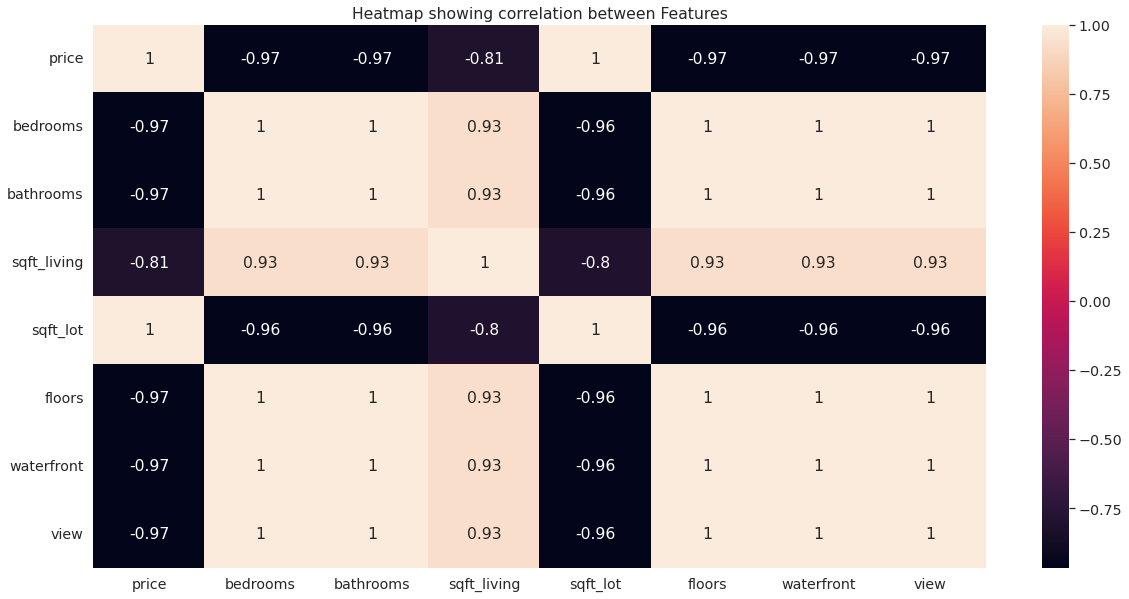

In [121]:
# Checking for correlations between features via a Heatmap

plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True) 
plt.title('Heatmap showing correlation between Features')
plt.show()

In [122]:
# Find the correlation of the variables

correlation= df.corr()
correlation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
price,1.00,-0.97,-0.97,-0.81,1.00,-0.97,-0.97,-0.97
bedrooms,-0.97,1.00,1.00,0.93,-0.96,1.00,1.00,1.00
bathrooms,-0.97,1.00,1.00,0.93,-0.96,1.00,1.00,1.00
sqft_living,-0.81,0.93,0.93,1.00,-0.80,0.93,0.93,0.93
sqft_lot,1.00,-0.96,-0.96,-0.80,1.00,-0.96,-0.96,-0.96
floors,-0.97,1.00,1.00,0.93,-0.96,1.00,1.00,1.00
waterfront,-0.97,1.00,1.00,0.93,-0.96,1.00,1.00,1.00
view,-0.97,1.00,1.00,0.93,-0.96,1.00,1.00,1.00


In [123]:
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(651.5689516049522, 1.2200694976856358e-119)

In [124]:
# residual plots and heteroskedasticity testing

X = df.values
y = df['price'].values

X_train, X_test, price_train, price_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, price_train)

# This is our prediction for admission based on our model
price_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(price_predict, price_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

2.8099605975384634e-12

In [125]:
test_result, p_value = sp.stats.bartlett(price_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(price_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

23.006827544111182
the variances are unequal, and the model should be reassessed


multiple linear regression


In [126]:
#separating independent and dependent variable

X = df.iloc[:,1:-1].values
y = df.iloc[:,-1] .values

In [127]:
##splitting dataset into training and testing dataset
#Train using 80% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [128]:
# Fitting Multiple Linear Regression to the Training set

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# Creating a baseline regression model
first_model = (mean_squared_error(y_true=y,y_pred=regressor.predict(X)))
print(first_model)

2.9773210884415974e-20


In [129]:
# regression coefficient
regressor.intercept_

1.9567675535459017e-07

In [130]:
# regression coeefficient
regressor.coef_

array([-5.67803083e-01,  9.92240276e-01,  3.06082150e-05,  6.65998021e-04,
       -3.91172384e-01,  9.66800721e-01])

In [131]:
for i in range(4):
    print(regressor.coef_[i])

-0.5678030828555285
0.9922402755010843
3.060821503980682e-05
0.0006659980209313687


In [132]:
# comparing the predicted and actual data
#We can compare y_pred and y_test to find its accuracy
y_pred = regressor.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,2.00,2.00
mean,1.00,1.00
std,0.00,0.00
min,1.00,1.00
25%,1.00,1.00
50%,1.00,1.00
75%,1.00,1.00
max,1.00,1.00


In [133]:
# Predicting the Test set results
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.836319512589114e-10
Mean Squared Error: 1.190928435376454e-19
Root Mean Squared Error: 3.4509830996057543e-10


In [134]:
# root mean squared error for X-train
rmse=np.sqrt(mean_squared_error(y_train,regressor.predict(X_train)))
rmse

7.850462293418876e-17

In [135]:
# regressor score
regressor.score(X_train,y_train)

1.0

In [136]:
# cross validation
from sklearn.model_selection import cross_val_score
np.sqrt(-cross_val_score(regressor,X_test,y_test,cv=2,scoring="neg_mean_squared_error")).mean()

5.713944317697894e-09

quantile regression

In [137]:
# recalling the base model
print(first_model)

2.9773210884415974e-20


In [138]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('price ~ bedrooms', df)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

# You see that our intercept is 2.55e+05 and our slope or the coefficient for our x is  4.75e+04. 
# These are the parameters for the 0.5th quantile of our y.

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.8470
Model:                       QuantReg   Bandwidth:                    0.001567
Method:                 Least Squares   Sparsity:                     0.003096
Date:                Sat, 16 Oct 2021   No. Observations:                    8
Time:                        22:37:43   Df Residuals:                        6
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8537      0.001    910.602      0.000       0.851       0.856
bedrooms      -1.0461      0.001   -946.450      0.000      -1.049      -1.043


ridge regression

In [139]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1] .values

In [140]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [144]:
# fitting our model with the ridge
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)



1.125470220176095e-06


Lasso regression


In [145]:
# Standadizing our features
#
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [146]:
# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_)

lasso score: 0.0
lasso MSE: 0.24570508141735597
lasso coef: [ 0.  0.  0. -0.  0.  0.]


In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.5316152391289624
linear score: 0.999999999999953
lasso MSE: 0.16649499102948598
linear MSE: 1.6699051490225936e-14
lasso best estimator coef: [ 0.          0.30047692  0.         -0.          0.09423712  0.02785775]
linear coef: [-6.55461028e-01  9.30478642e-01  1.39089243e-04  7.32750075e-04
 -2.12775712e-01  9.37742618e-01]


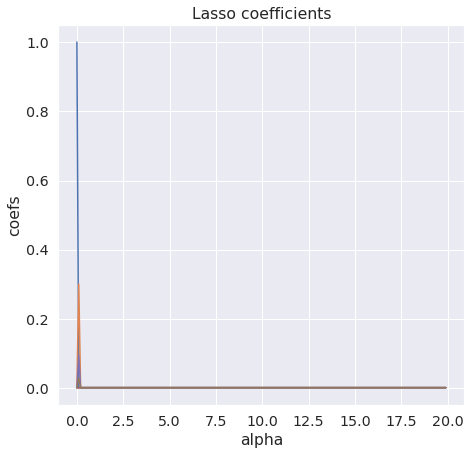

In [149]:
# Building Lasso for 200 values of alpha and write the coefficients into array
# 

coefsLasso = [] 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

Elastic Net Regression

In [150]:
# Creating our linear regression model for the purpose of comparison
first_model

2.9773210884415974e-20

In [151]:
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [154]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1] .values
regr = ElasticNet(random_state=0)
regr.fit(X, y)
third_model = (mean_squared_error(y_true=y,y_pred=regr.predict(X)))
print(third_model)

0.24570508141735597


In [155]:
regr.coef_

array([ 0.,  0.,  0., -0.,  0.,  0.])

In [156]:
regr.intercept_

0.6882444220098913

Conclusively, the appropriate prediction model for the housing prices is the multiple linear regression, a model that was used as the base comparison model.
But some are inaccurate and overfitting.
